In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

# Carregar o arquivo JSON usando o pandas
df = pd.read_json('supermarket.json')

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df.head())

                                               lojas
0  {'id': 1, 'dados_mensais': [{'mes': 1, 'fatura...
1  {'id': 2, 'dados_mensais': [{'mes': 1, 'fatura...
2  {'id': 3, 'dados_mensais': [{'mes': 1, 'fatura...
3  {'id': 4, 'dados_mensais': [{'mes': 1, 'fatura...
4  {'id': 5, 'dados_mensais': [{'mes': 1, 'fatura...


In [15]:
# Função para extrair os dados de um determinado mês para uma loja específica
def extrair_dados_loja(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                    return dados_mensais
    return None

In [38]:
# Função para plotar gráfico de linha com os dados de faturamento ao longo do ano para uma loja
def plotar_grafico_faturamento(loja_id):
    faturamento_mensal = []
    meses = range(1, 13)
    for mes in meses:
        dados_mes = extrair_dados_loja(loja_id, mes)
        faturamento_mensal.append(dados_mes['faturamento'])

    plt.plot(meses, faturamento_mensal, marker='o')
    plt.title(f'Faturamento Mensal - Loja {loja_id}')
    plt.xlabel('Mês')
    plt.ylabel('Faturamento')
    plt.xticks(meses)
    plt.grid(True)
    plt.show()

In [9]:
# Função para plotar gráfico de barras com os gastos totais ao longo do ano para uma loja
def plotar_grafico_gastos_totais(loja_id):
    gastos_totais = {'Funcionários': 0, 'Fornecedores': 0, 'Diversos': 0}
    meses = range(1, 13)
    for mes in meses:
        dados_mes = extrair_dados_loja(loja_id, mes)
        gastos_totais['Funcionários'] += dados_mes['gastos_funcionarios']
        gastos_totais['Fornecedores'] += dados_mes['despesas_fornecedores']
        gastos_totais['Diversos'] += dados_mes['gastos_diversos']

    plt.bar(gastos_totais.keys(), gastos_totais.values())
    plt.title(f'Gastos Totais - Loja {loja_id}')
    plt.xlabel('Categoria de Gastos')
    plt.ylabel('Valor')
    plt.show()

In [16]:
extrair_dados_loja(2,4)

{'mes': 4,
 'faturamento': {'higiene_e_saude': 14900,
  'limpeza': 19900,
  'bebidas': 8700,
  'carne_e_laticinios': 5000,
  'alimentacao': 5400},
 'gastos_funcionarios': 21000,
 'despesas_fornecedores': 17000,
 'gastos_diversos': 6300}

In [35]:
plotar_grafico_faturamento(1,2)

In [ ]:
plotar_grafico_gastos_totais(1)

In [81]:
def extrair_faturamento_loja(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                  for faturamento_mes in dados_mensais['faturamento']:
                      faturamento_mes = sum(dados_mensais['faturamento'].values())
                  return faturamento_mes
    return None
extrair_faturamento_loja(1,1)

53800

In [93]:
def extrair_faturamento_anual(loja_id):
    faturamento_anual = 0
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                faturamento_anual += sum(dados_mensais['faturamento'].values())
    return faturamento_anual


 
 


In [77]:
def extrair_lucro_loja(loja_id, mes):
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                if dados_mensais['mes'] == mes:
                  for faturamento_mes in dados_mensais['faturamento']:
                      faturamento_mes = sum(dados_mensais['faturamento'].values())
                      gastos = dados_mensais['gastos_funcionarios'] + dados_mensais['gastos_diversos']
                      lucro = faturamento_mes - gastos
                  return lucro
    return None
extrair_lucro_loja(1,1)

28800

In [78]:
def extrair_lucro_anual(loja_id):
    lucro = 0
    for loja in df['lojas']:
        if loja['id'] == loja_id:
            for dados_mensais in loja['dados_mensais']:
                faturamento_mes = sum(dados_mensais['faturamento'].values())
                gastos = dados_mensais['gastos_funcionarios'] + dados_mensais['gastos_diversos']
                lucro += (faturamento_mes - gastos)
    return lucro

extrair_lucro_anual(1)

272200

In [82]:

for i in range(1,6):
   print (extrair_faturamento_anual(i))
   print (extrair_lucro_anual(i))

644800
272200
643000
282400
637500
154500
633600
181100
614500
203500


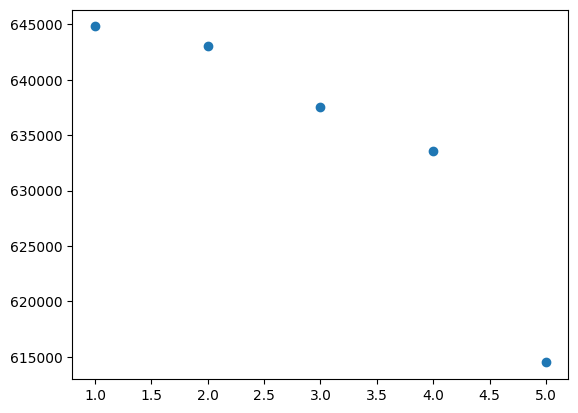

In [97]:
lojas = range(1,6)
faturamento = []
for i in lojas:
   faturamento.append(extrair_faturamento_anual(i))
   
plt.plot(lojas, faturamento,'o')

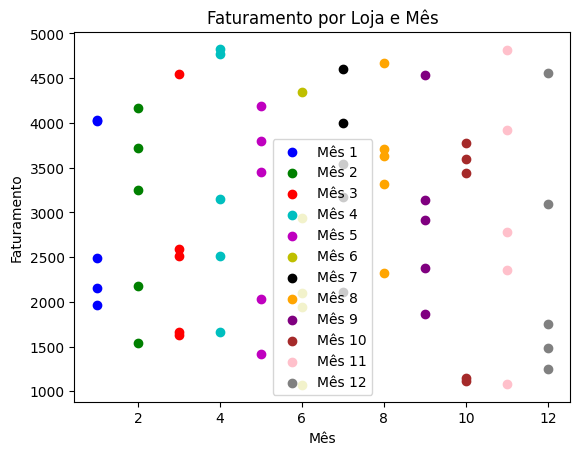

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Simulando dados de faturamento para 5 lojas ao longo de 12 meses
faturamento_por_mes = {
    mes: np.random.randint(1000, 5000, size=5) for mes in range(1, 13)
}

# Cores para cada mês
cores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray']

# Criando o gráfico
for mes, faturamento in faturamento_por_mes.items():
    plt.scatter([mes]*5, faturamento, color=cores[mes-1], label=f'Mês {mes}')

plt.title('Faturamento por Loja e Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.legend()
plt.show()
